In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("spam.csv")
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.tail()

,Category,Message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [5]:
df.shape

(5572, 2)

In [6]:
df["Category"].value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.Message,df.Category,test_size=0.2,random_state=40)

In [8]:
X_train[:5]

15      XXXMobileMovieClub: To use your credit, click ...
1301    Those cocksuckers. If it makes you feel better...
3059    You are now unsubscribed all services. Get ton...
3123    Free entry in 2 a weekly comp for a chance to ...
1884    Come to me, slave. Your doing it again ... Goi...
Name: Message, dtype: object

In [9]:
y_train[:5]

15      spam
1301     ham
3059    spam
3123    spam
1884     ham
Name: Category, dtype: object

### Machine learning doesn't underdstand words so thats why covert into numbers 
### string----into----> numbers

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
v=CountVectorizer()
X_train_count=v.fit_transform(X_train)
X_test_count=v.transform(X_test)

In [11]:
X_train_count.toarray()[:5]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [12]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
model.fit(X_train_count,y_train)

MultinomialNB()

In [13]:
from sklearn.metrics import classification_report

y_pred=model.predict(X_test_count)
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       971
        spam       0.95      0.92      0.93       144

    accuracy                           0.98      1115
   macro avg       0.97      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [14]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[964,   7],
       [ 12, 132]], dtype=int64)

### data visulaization

<function matplotlib.pyplot.show(close=None, block=None)>

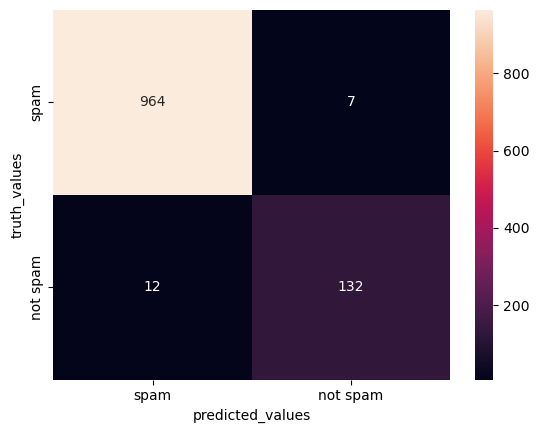

In [15]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.heatmap(cm,annot=True,fmt="d",xticklabels=["spam","not spam"],yticklabels=["spam","not spam"])
plt.xlabel("predicted_values")
plt.ylabel("truth_values")
plt.show

### email prediction

In [18]:
emails=['hi this is bairimukeshkumar',
        'upto 20% discount on parking,exclusive offer just for you dont miss is out!' ]
emails_count=v.transform(emails)
model.predict(emails_count)

array(['ham', 'spam'], dtype='<U4')